In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset_train = pd.read_csv('../Data/003_stock_prediction/Google_Stock_Price_Train.csv')
dataset_test = pd.read_csv('../Data/003_stock_prediction/Google_Stock_Price_Test.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [35]:
training_set = dataset_train.iloc[:,1:2].values
testing_set = dataset_test.iloc[:,1:2].values

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scalled = sc.fit_transform(training_set)


In [18]:
# Create a data structure with 60 timesteps and 1 output
X_train, y_train = [],[]
for i in range(60, len(training_set_scalled)):
    X_train.append(training_set_scalled[i-60:i,0])
    y_train.append(training_set_scalled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [34]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

(1198, 60, 1)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [25]:
# RNN Architecture
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [30]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 8s 26ms/step - loss: 0.0386
Epoch 2/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0063
Epoch 4/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 1s 24ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0054
Epoch 9/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 1s 24ms/step - loss: 0.0041
Epoch 13/100
38/38 [=====

In [36]:
real_stock_price = testing_set

In [38]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)

In [44]:
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 873ms/step


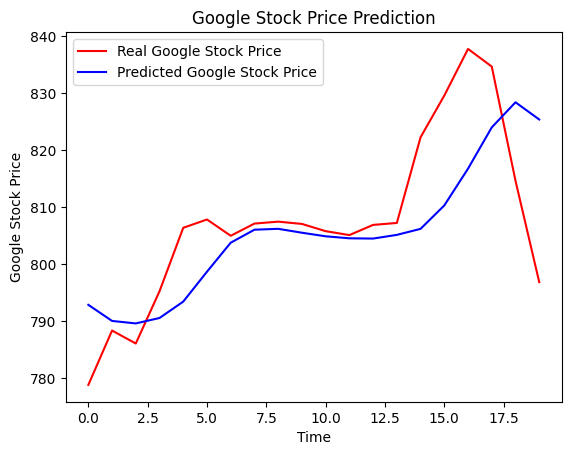

In [46]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()